In [226]:
import pandas as pd
import numpy as np


df = df= pd.read_csv("D:\STUDY\MBA\MBA 753\RapidMiner\GROCERY.csv")
print(len(df))
df.head()

1000


,Transaction,Purchase Date,Customer ID,Gender,Annual Income,Product Category,Units Sold,Revenue
0,1,12/26/2011,9357,NaN,$30K - $50K,Food,3.0,$11.82
1,2,1/1/2012,6510,F,$50K - $70K,Food,5.0,$7.23
2,3,1/5/2012,3533,F,NaN,Drink,4.0,$2.94
3,4,1/7/2012,2061,M,$10K - $30K,Food,5.0,$11.05
4,5,1/9/2012,2198,F,$50K - $70K,Non-Consumable,3.0,$17.28


In [227]:
df.dropna(how='any', inplace=True)
# print(len(df))
# df.head()
count_False = 0
count_NaN = 0
for i in range(0,len(df)):
#     print(i)
    if (pd.isna(df.iloc[i,7])==False):
#         print(df.iloc[i,:])
        count_False = count_False + 1
    if (pd.isna(df.iloc[i,7])==True):
#         print(df.iloc[i,:])
        count_NaN = count_NaN + 1
    
print(count_NaN)
print(count_False)

0
971


In [219]:
df.head()

,Transaction,Purchase Date,Customer ID,Gender,Annual Income,Product Category,Units Sold,Revenue
1,2,1/1/2012,6510,F,$50K - $70K,Food,5.0,$7.23
3,4,1/7/2012,2061,M,$10K - $30K,Food,5.0,$11.05
4,5,1/9/2012,2198,F,$50K - $70K,Non-Consumable,3.0,$17.28
5,6,1/13/2012,1429,F,$30K - $50K,Non-Consumable,2.0,$12.70
6,7,1/14/2012,1254,F,$90K - $110K,Food,4.0,$24.11


In [228]:
### CHANGING REVENUE COLUMN TO FLOAT
df['Revenue']  = df['Revenue'].str.replace('$', " ")
df['Revenue']  = df['Revenue'].str.replace(',', "")
df['Revenue'] = df['Revenue'].astype('float64')


count_False = 0
count_NaN = 0
for i in range(0,len(df)):
#     print(i)
    if (pd.isna(df.iloc[i,7])==False):
#         print(df.iloc[i,:])
        count_False = count_False + 1
    if (pd.isna(df.iloc[i,7])==True):
        print(df.iloc[i,:])
        count_NaN = count_NaN + 1
    
print(count_NaN)
print(count_False)
print(df.dtypes)

0
971
Transaction           int64
Purchase Date        object
Customer ID           int64
Gender               object
Annual Income        object
Product Category     object
Units Sold          float64
Revenue             float64
dtype: object


In [230]:
df['Revenue'].max()

578545.65

In [232]:
df['Gender'] = df['Gender'].map({'M': 'Male','F': 'Female','Male': 'Male','Female': 'Female' })
codes = {'Foods': 'Food', 'Drinks': 'Drink', 'None Consumable' : 'Non-Consumable',
         'Food': 'Food', 'Drink': 'Drink', 'Non-Consumable' : 'Non-Consumable'}
df['Product Category'] = df['Product Category'].map(codes)
# df1 = df.rename({'Product Category':'Product_Category'}, axis=1)
# df1.head()
print(df['Product Category'].unique())
print(df['Gender'].unique())
df.head()

['Food' 'Non-Consumable' 'Drink']
['Female' 'Male']


,Transaction,Purchase Date,Customer ID,Gender,Annual Income,Product Category,Units Sold,Revenue
1,2,1/1/2012,6510,Female,$50K - $70K,Food,5.0,7.23
3,4,1/7/2012,2061,Male,$10K - $30K,Food,5.0,11.05
4,5,1/9/2012,2198,Female,$50K - $70K,Non-Consumable,3.0,17.28
5,6,1/13/2012,1429,Female,$30K - $50K,Non-Consumable,2.0,12.70
6,7,1/14/2012,1254,Female,$90K - $110K,Food,4.0,24.11


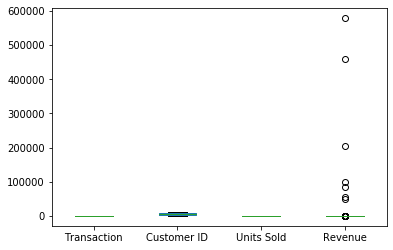

In [233]:
df.plot(kind='box')

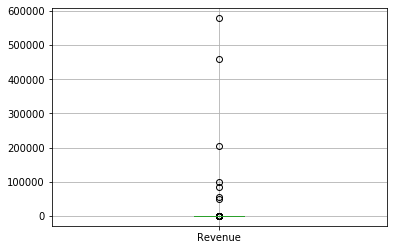

In [234]:
plt.figure()
df.boxplot(['Revenue'])

In [235]:
Rev_list = list(df['Revenue'])
Rev_list.sort(reverse = True)
print(Rev_list)

[578545.65, 459528.95, 205950.7, 97857.5, 85377.5, 54323.6, 49003.55, 47.25, 44.1, 43.95, 42.57, 42.12, 40.82, 40.6, 40.14, 39.5, 38.88, 38.11, 37.65, 37.44, 37.37, 36.75, 36.72, 36.67, 36.61, 36.34, 36.2, 36.06, 34.42, 33.86, 33.23, 33.06, 32.97, 32.48, 32.48, 32.02, 31.77, 31.33, 31.23, 31.04, 30.99, 30.96, 30.78, 30.72, 30.58, 30.56, 30.36, 30.26, 29.79, 29.79, 29.4, 29.23, 29.12, 28.96, 28.86, 28.86, 28.64, 28.62, 28.61, 28.42, 28.24, 28.04, 27.75, 27.55, 27.16, 27.12, 27.06, 27.03, 26.96, 26.88, 26.84, 26.83, 26.59, 26.43, 26.32, 26.11, 26.07, 26.07, 26.06, 26.0, 25.98, 25.9, 25.84, 25.75, 25.69, 25.67, 25.64, 25.27, 25.08, 25.06, 24.89, 24.86, 24.84, 24.64, 24.34, 24.29, 24.19, 24.19, 24.12, 24.11, 23.98, 23.94, 23.92, 23.81, 23.81, 23.76, 23.74, 23.63, 23.61, 23.57, 23.52, 23.5, 23.49, 23.46, 23.35, 23.33, 23.32, 23.32, 23.32, 23.3, 23.27, 23.25, 23.18, 23.06, 23.04, 22.95, 22.91, 22.88, 22.88, 22.85, 22.85, 22.71, 22.7, 22.63, 22.62, 22.57, 22.57, 22.56, 22.52, 22.51, 22.44, 22

In [237]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

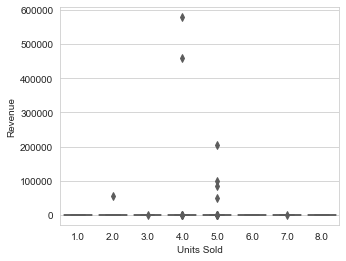

In [239]:
sb.boxplot(x='Units Sold',y='Revenue', data=df,palette='hls')

In [246]:
df_rev=df['Revenue']
df_wo_outliers= (df_rev<48)
df=df[df_wo_outliers]
len(df[df_wo_outliers])

C:\Users\mkahs\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


964

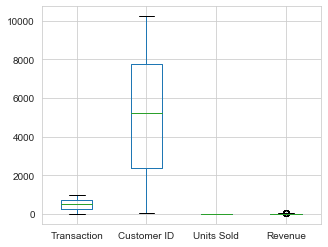

In [247]:
df.plot(kind='box')

In [248]:
print(df.describe())

       Transaction   Customer ID  Units Sold     Revenue
count   964.000000    964.000000  964.000000  964.000000
mean    498.242739   5170.882780    4.078838   12.891784
std     287.284792   3007.847154    1.192747    8.304263
min       2.000000     28.000000    1.000000    0.970000
25%     248.750000   2380.250000    3.000000    6.430000
50%     497.500000   5201.000000    4.000000   11.165000
75%     746.250000   7752.500000    5.000000   17.760000
max    1000.000000  10231.000000    8.000000   47.250000


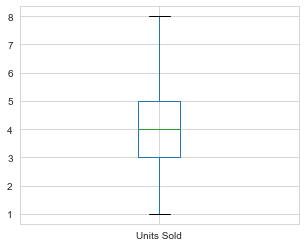

In [249]:
plt.figure()
df.boxplot(['Units Sold'])

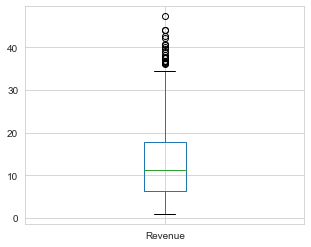

In [250]:
plt.figure()
df.boxplot(['Revenue'])